# Homework 06: PCA, FFT and ML

# Date: 11/28/2018
# Due: 12/14/2018; 10:30 PM

## Objectives: We will practice on PCA and machine learning.

You are encouraged to discuss problems with your classmates, but it is required that you write your answer individually.

---
### Your name: Boyao Zhu

---
## Problem 1

In this assignment we will demistify PCA by implementing each step separately.

At the end of the assignment we will see an example of how PCA (+ SVM: supported vector machines) can be used to model the problem of face recognition with success rates of around 80%.

There are exactly 5 cells in which to complete code. This practice is quite similar to the pre-class assignment of PCA, but with a bigger data space.



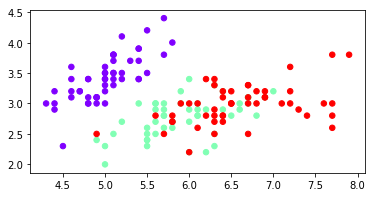

In [1]:
# load in modules 

import numpy as np

import scipy.linalg

import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as ds

import matplotlib.pyplot as plt
%matplotlib inline

# load the data iris data set (for more details about this data set, see the Day 2 in-class activity)

iris = ds.load_iris()
X = iris.data
y = iris.target

# Now a scatter plot with the first 2 variables (sepal length, sepal width) from the data 

plt.figure(figsize=(6,3));

plt.scatter( X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.rainbow );


### Step 1:
Center (also referred to as standarize) the data

In [2]:
# code cell 1 of 5

# Please provide code below to center the data. The result should be in an array X_cent with the same size as X
from sklearn import preprocessing
X_cent = preprocessing.scale(X)
print (X_cent.shape)

(150, 4)


### Step 2:
Compute the covariance matrix of the standariezed data

In [3]:
# code cell 2 of 5

# Please provide code below to compute the covariance matrix Cov 

Cov = np.matmul(X_cent.T,X_cent)
print (Cov)


[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]


### Step 3:
Compute the eigenvectors and eingevalues of the covariance matrix. In addition, sort them from largest to smallest eigenvalue.

In [4]:
# code cell 3 of 5

# Please provide code below to compute the eigenvectors and eigenvalues of the covariance matrix. 
# make sure that the eigenvectors, and eigenvalues, are sorted from largest to smallest eigenvalue.
w , v = np.linalg.eig(Cov)
idx = w.argsort()[::-1]
eig_vectors = v[:,idx]

eig_values  = w[idx]

# The ordered eigenvectors are the principal components of the data. 
print (eig_vectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Step 4:

Represent the centered data with respect to the computed components.

Here is a bit of linear algebra magic: Recall that two vectors $u,v \in \mathbb{R}^d$ are said to be **orthonormal** if each one has length 1: $\|u\| = \|v\| = 1$, and they are perpendicular: *dot_product*$(u,v) = 0$. If $v_1,\ldots, v_d$ is a basis for 
$\mathbb{R}^d$ then every vector $v\in \mathbb{R}^d$ can be written as $$v = a_1 v_1 + \cdots + a_d v_d $$ for unique 
scalars $a_1,\ldots, a_d \in \mathbb{R}$. These scalars are called the **coefficients of $v$ with respect to the basis  $v_1,\ldots, v_d$**.
To find these coefficients one would have to solve a d-by-d system of linear equations, but if the 
$v_i$'s are orthonormal then the computation is a lot easier: $$a_i = \mbox{dot_product}(v,v_i) \;\;\;\;\;  i =1,\ldots, d$$

In [5]:
# code cell 4 of 5
# Please check that the eigenvectors computed above are orthonormal. Hint: This can be achieved using matrix multiplication.

eig_h = eig_vectors.T

M = np.matmul(eig_h,eig_vectors)

diag = np.diag(np.diag(M))
of_diag = M - diag
print (M)

# elements on diagonal is 1, while the ones on off diagonal is e-16, which are numerical error.

[[ 1.00000000e+00  1.11022302e-16  4.44089210e-16  0.00000000e+00]
 [ 1.11022302e-16  1.00000000e+00  1.11022302e-16  1.52655666e-16]
 [ 4.44089210e-16  1.11022302e-16  1.00000000e+00 -8.88178420e-16]
 [ 0.00000000e+00  1.52655666e-16 -8.88178420e-16  1.00000000e+00]]


In [6]:
# code cell 5 of 5

# Please provide code below to compute the coefficients of (the rows of) X_cent 
# with respect to the basis of eigenvectors eig_vectors computed above.



# The result should be in an array X_pca. Hint: use matrix multiplication 

X_pca = np.matmul(X_cent,eig_vectors)


### Step 5:

Visualize the data with respect to its principal components. If everything went well, when you run the code below it should show the data represented in terms of its first two principal components.

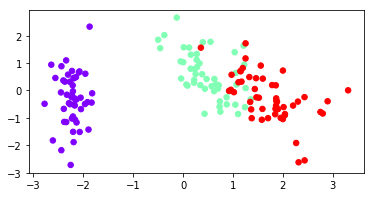

In [7]:
plt.figure(figsize=(6,3));
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=30, cmap=plt.cm.rainbow)

---
## Problem 2

In this assignment we will learn about model selection. In data rich environments one often uses a portion of the data for training purposes, but if the model itself includes parameters then it is important to have a systematic procedure for making these choices. Moreover, once the parameters have been chosen and the model trained, it is important to report an unbiased expected prediction accuracy of what we've built. This assignment explores these issues.

We will be training several models with a large data set, which might take some time. Please plan your schedule accordingly.


### Step 1
Load the libraries needed for this work.

In [8]:
# Your code:

from sklearn.model_selection import train_test_split
from noaa_scraper import get_noaa_temperatures

Load NOAA temperature data. Since the the data for 2007 and 2018 are incomplete for a full year, we shall use data from 2008 to 2017. 

FloatProgress(value=0.0)

FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2007/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2008/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2009/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2010/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2011/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2012/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS01

FloatProgress(value=0.0, max=12.0)

reading... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2013-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2014-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2015-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2016-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2017-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2018-MI_Gaylord_9_SSW.txt


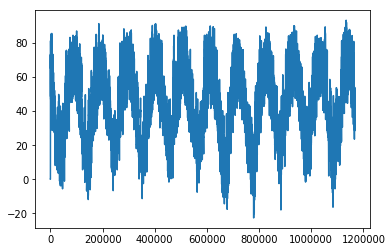

In [9]:
# Your code:

air_temperatures = get_noaa_temperatures('http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/', 'Gaylord', 100)
plt.plot(air_temperatures)


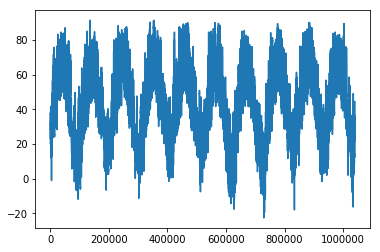

In [17]:
air_temperature = air_temperatures[50000:1090000]
plt.plot(air_temperature)

### Step 2

Divide the data into 3 portions: the first (years 2008~2015) will be the **training set**, the next (year 2016) will be the **validation set** and the last (year 2017) will be the **testing set**. 

In [18]:
T2008_2015 = air_temperature[0:850000]
T2016 = air_temperature[850000:940000]
T2017 = air_temperature[940000:]


In [28]:
# Your code:
training_set = T2008_2015
validation_set = T2016
testing_set = T2017




### Step 3:

Recall that if the training set has *n_training* observations, then the parameter *n_harmonics* in the function 
**fourierExtrapolation** can take values between 1 and * int(n_training/2) *.

**a)** Training a first model: Choose a number of harmonics, and set  *n_predictions* appropriately so that using the  *training set* you can predict the values for the *validation set*. Train the model resulting from these choices using the **fourierExtrapolation** function from previous class.

**Here,** we should modify the fourierExtrapolation code such that the most influential frequencies are used in the Fourier transform, which is similar to what we did in the previous in-class work.

In [22]:
# Your code:
import numpy as np
from numpy import fft

import matplotlib.pyplot as plt
%matplotlib notebook

#following are needed for the progress bar
from ipywidgets import FloatProgress
#from IPython.display import display
    
def fourierExtrapolation(data, n_predictions, n_harmonics, de_trend):
    
    n = data.size
    t = np.arange(0, n)
    
    if de_trend:
        p = np.polyfit(t, data, 1)            # find linear trend in data
        data_notrend = data - p[0] * t        # detrended data
    else:
        p = np.array([0])
        data_notrend = data
        
    
    data_freqdom = fft.fft(data_notrend)  # data in frequency domain
    f = fft.fftfreq(n)                    # frequencies

    indexes = list(range(n))
 
    t = np.arange(0, n + n_predictions)  # extended sampling interval
    
    fitted_signal = np.zeros(t.size)      
    
    progressBar = FloatProgress(min=0, max=1 + n_harmonics * 2)
    display(progressBar)
    progressBar.value = 0
       
    for i in indexes[:1 + n_harmonics * 2]:
        
        progressBar.value += 1
        
        ampli = np.absolute(data_freqdom[i]) / n   # amplitude
        
        phase = np.angle(data_freqdom[i])          # phase
        
        fitted_signal += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    
    return fitted_signal + p[0] * t


**b)** Suppose one has observations $x_0,\ldots, x_n$ and that these values haven been predicted as 
$\tilde{x}_0 ,\ldots, \tilde{x}_n$ using some model (e.g., Fourier Extrapolation). The **Mean Squared Error** associated
to these predictions is defined as 
$$\mathbf{MSE} = \frac{1}{n} \sum_{j=0}^n (x_j - \tilde{x}_j)^2 $$

Using the model from part a) and the function **mean_squared_error**
from the **scikit-learn** library, calculate/report the associated mean squared error for:
1. Fitting the training set: ** training error ** 
1. Predicting the validation set: ** validation error **

FloatProgress(value=0.0, max=21.0)

<IPython.core.display.Javascript object>


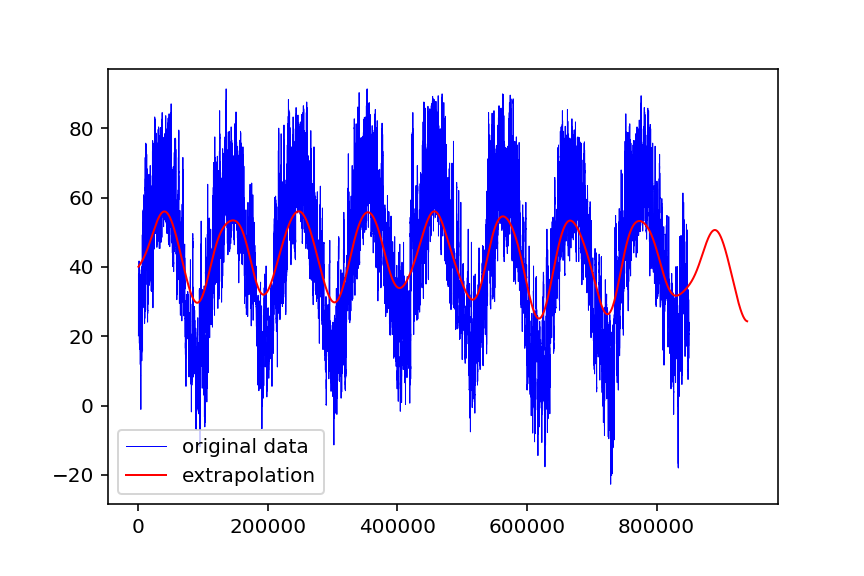

175.4994799565829
260.76139310846804


In [23]:
# Your code:
n_harmonics = 10
n_predictions = len(validation_set)
de_trend = True

data = np.asarray(training_set)

extrapolation = fourierExtrapolation(data, n_predictions, n_harmonics, de_trend)


plt.plot(np.arange(0, data.size), data, 'b', label = 'original data', linewidth = 0.5)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation', linewidth = 1)

plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error

training_error = mean_squared_error(data, extrapolation[0:len(data)])
print (training_error)

validation_error = mean_squared_error(validation_set, extrapolation[len(data):])
print (validation_error)


### Step 4:

We will now repeat **several times** what we did in Step 3. As in the previous assignment, the range n_harmonics can be between 1 and int(n_training/2). Let's try set the range of training from 1 to 100.


For each value k in training_range: 

1. Let n_harmonics = k
1. Calculate the training_error and validation_error as in question 3.

Next, make a single plot with the curves "n_harmonics vs. training_error" and  "n_harmonics vs. validation_error"




FloatProgress(value=0.0, max=3.0)

FloatProgress(value=0.0, max=5.0)

FloatProgress(value=0.0, max=7.0)

FloatProgress(value=0.0, max=9.0)

FloatProgress(value=0.0, max=11.0)

FloatProgress(value=0.0, max=13.0)

FloatProgress(value=0.0, max=15.0)

FloatProgress(value=0.0, max=17.0)

FloatProgress(value=0.0, max=19.0)

FloatProgress(value=0.0, max=21.0)

FloatProgress(value=0.0, max=23.0)

FloatProgress(value=0.0, max=25.0)

FloatProgress(value=0.0, max=27.0)

FloatProgress(value=0.0, max=29.0)

FloatProgress(value=0.0, max=31.0)

FloatProgress(value=0.0, max=33.0)

FloatProgress(value=0.0, max=35.0)

FloatProgress(value=0.0, max=37.0)

FloatProgress(value=0.0, max=39.0)

FloatProgress(value=0.0, max=41.0)

FloatProgress(value=0.0, max=43.0)

FloatProgress(value=0.0, max=45.0)

FloatProgress(value=0.0, max=47.0)

FloatProgress(value=0.0, max=49.0)

FloatProgress(value=0.0, max=51.0)

FloatProgress(value=0.0, max=53.0)

FloatProgress(value=0.0, max=55.0)

FloatProgress(value=0.0, max=57.0)

FloatProgress(value=0.0, max=59.0)

FloatProgress(value=0.0, max=61.0)

FloatProgress(value=0.0, max=63.0)

FloatProgress(value=0.0, max=65.0)

FloatProgress(value=0.0, max=67.0)

FloatProgress(value=0.0, max=69.0)

FloatProgress(value=0.0, max=71.0)

FloatProgress(value=0.0, max=73.0)

FloatProgress(value=0.0, max=75.0)

FloatProgress(value=0.0, max=77.0)

FloatProgress(value=0.0, max=79.0)

FloatProgress(value=0.0, max=81.0)

FloatProgress(value=0.0, max=83.0)

FloatProgress(value=0.0, max=85.0)

FloatProgress(value=0.0, max=87.0)

FloatProgress(value=0.0, max=89.0)

FloatProgress(value=0.0, max=91.0)

FloatProgress(value=0.0, max=93.0)

FloatProgress(value=0.0, max=95.0)

FloatProgress(value=0.0, max=97.0)

FloatProgress(value=0.0, max=99.0)

FloatProgress(value=0.0, max=101.0)

FloatProgress(value=0.0, max=103.0)

FloatProgress(value=0.0, max=105.0)

FloatProgress(value=0.0, max=107.0)

FloatProgress(value=0.0, max=109.0)

FloatProgress(value=0.0, max=111.0)

FloatProgress(value=0.0, max=113.0)

FloatProgress(value=0.0, max=115.0)

FloatProgress(value=0.0, max=117.0)

FloatProgress(value=0.0, max=119.0)

FloatProgress(value=0.0, max=121.0)

FloatProgress(value=0.0, max=123.0)

FloatProgress(value=0.0, max=125.0)

FloatProgress(value=0.0, max=127.0)

FloatProgress(value=0.0, max=129.0)

FloatProgress(value=0.0, max=131.0)

FloatProgress(value=0.0, max=133.0)

FloatProgress(value=0.0, max=135.0)

FloatProgress(value=0.0, max=137.0)

FloatProgress(value=0.0, max=139.0)

FloatProgress(value=0.0, max=141.0)

FloatProgress(value=0.0, max=143.0)

FloatProgress(value=0.0, max=145.0)

FloatProgress(value=0.0, max=147.0)

FloatProgress(value=0.0, max=149.0)

FloatProgress(value=0.0, max=151.0)

FloatProgress(value=0.0, max=153.0)

FloatProgress(value=0.0, max=155.0)

FloatProgress(value=0.0, max=157.0)

FloatProgress(value=0.0, max=159.0)

FloatProgress(value=0.0, max=161.0)

FloatProgress(value=0.0, max=163.0)

FloatProgress(value=0.0, max=165.0)

FloatProgress(value=0.0, max=167.0)

FloatProgress(value=0.0, max=169.0)

FloatProgress(value=0.0, max=171.0)

FloatProgress(value=0.0, max=173.0)

FloatProgress(value=0.0, max=175.0)

FloatProgress(value=0.0, max=177.0)

FloatProgress(value=0.0, max=179.0)

FloatProgress(value=0.0, max=181.0)

FloatProgress(value=0.0, max=183.0)

FloatProgress(value=0.0, max=185.0)

FloatProgress(value=0.0, max=187.0)

FloatProgress(value=0.0, max=189.0)

FloatProgress(value=0.0, max=191.0)

FloatProgress(value=0.0, max=193.0)

FloatProgress(value=0.0, max=195.0)

FloatProgress(value=0.0, max=197.0)

FloatProgress(value=0.0, max=199.0)

FloatProgress(value=0.0, max=201.0)

<IPython.core.display.Javascript object>


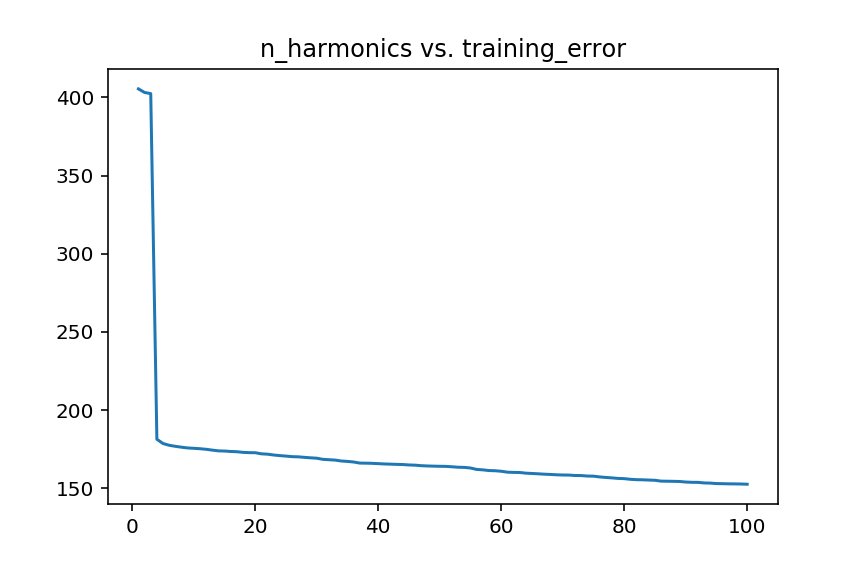

<IPython.core.display.Javascript object>


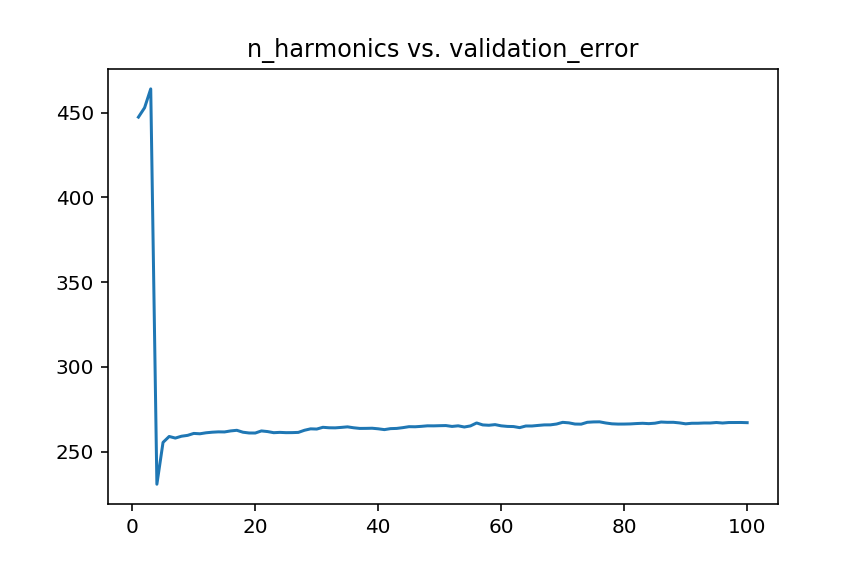

In [27]:
# Your code:
n_predictions = len(validation_set)
de_trend = True
n_harmonics = [i for i in range(1,101)]

data = np.asarray(training_set)

train = []
valid = []

for i in n_harmonics:
    extrapolation = fourierExtrapolation(data, n_predictions, i, de_trend)
    training_error = mean_squared_error(data, extrapolation[0:len(data)])
    validation_error = mean_squared_error(validation_set, extrapolation[len(data):])
    train.append(training_error)
    valid.append(validation_error)
fig = plt.figure()
plt.plot(n_harmonics,train)
plt.title('n_harmonics vs. training_error')
plt.show()

fig2 = plt.figure()
plt.plot(n_harmonics,valid)
plt.title('n_harmonics vs. validation_error')
plt.show()


**Question: Is n_hamonics = 100 overfitted or underfitted? Why? **

**Your Answer: **  It is kind of overfitted. Because when looking at the trend, training error keeps decreasing while the validation error starts to increase when n is larger than and equal to 4.

---
### Step 5:

As you may notice from the plot above, there is a range of values for which increasing n_harmonics improves the fit.

Use the plot to find a balance, fit the model to the testing set and report the **testing error** (i.e. the mean squared error in the testing set).

In [30]:
# Your code:
n_predictions = len(testing_set)
n_harmonics = 4
de_trend = True

data = np.asarray(training_set+validation_set)

extrapolation = fourierExtrapolation(data, n_predictions, n_harmonics, de_trend)
testing_error = mean_squared_error(testing_set,extrapolation[len(data):])
print (testing_error)

FloatProgress(value=0.0, max=9.0)

444.9430486487743


---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > Homework 06".